# Predicting the Quality of wine using 3 Different alogrithms and hence Comparing their predicted accuracies

Import wine data

In [ ]:
import pandas as pd
data=pd.read_csv("wine.csv")
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
data.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Wine                  178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic.acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Acl                   178 non-null    float64
 5   Mg                    178 non-null    int64  
 6   Phenols               178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid.phenols  178 non-null    float64
 9   Proanth               178 non-null    float64
 10  Color.int             178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD                    178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [6]:
data["Wine"].unique()

array([1, 2, 3])

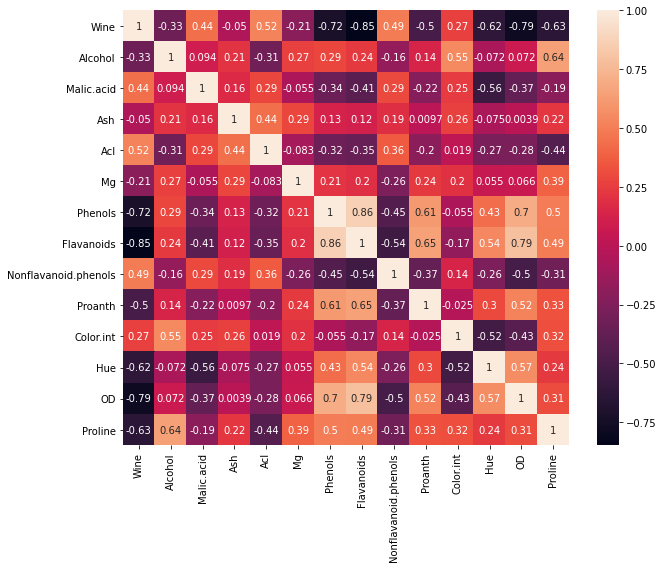

In [23]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True)

In [ ]:
Building Naive Bias model

In [25]:
from sklearn.naive_bayes import GaussianNB
x=data.iloc[:,1:]
y=data.iloc[:,0]

In [55]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest=train_test_split(x,y,random_state=14,test_size=0.3)

In [33]:
model=GaussianNB()

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
22,13.71,1.86,2.36,16.6,101,2.61,2.88,0.27,1.69,3.80,1.11,4.00,1035
108,12.22,1.29,1.94,19.0,92,2.36,2.04,0.39,2.08,2.70,0.86,3.02,312
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
145,13.16,3.57,2.15,21.0,102,1.50,0.55,0.43,1.30,4.00,0.60,1.68,830
71,13.86,1.51,2.67,25.0,86,2.95,2.86,0.21,1.87,3.38,1.36,3.16,410
...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,11.82,1.72,1.88,19.5,86,2.50,1.64,0.37,1.42,2.06,0.94,2.44,415
67,12.37,1.17,1.92,19.6,78,2.11,2.00,0.27,1.04,4.68,1.12,3.48,510
117,12.42,1.61,2.19,22.5,108,2.00,2.09,0.34,1.61,2.06,1.06,2.96,345
47,13.90,1.68,2.12,16.0,101,3.10,3.39,0.21,2.14,6.10,0.91,3.33,985


In [47]:
model.fit(Xtrain,Ytrain)

GaussianNB(priors=None, var_smoothing=1e-09)

In [48]:
predy=model.predict(Ytrain)

Data is perfectly cleaned so that's why Accuracy is 100% :D

In [49]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(Ytest,predy)
acc

1.0

In [53]:
from sklearn.metrics import classification_report,confusion_matrix
accur=classification_report(Ytest,predy)
print(accur)
print(confusion_matrix(Ytest,predy))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00        18
           3       1.00      1.00      1.00        13

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54

[[23  0  0]
 [ 0 18  0]
 [ 0  0 13]]


Building SVM(Support vector machine) Model

In [70]:
from sklearn.svm import SVC
classifier = SVC(random_state=0,kernel='linear')  
classifier.fit(Xtrain,Ytrain)  

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

Accuracy of SVM model

In [123]:
PredSVM=classifier.predict(Xtest)
accsvm=accuracy_score(Ytest,PredSVM)
print(accsvm)
print(confusion_matrix(Ytest,PredSVM))

[[23  0  0]
 [ 0 17  1]
 [ 0  1 12]]


Building KNN(K Nearest_neighbour) Model 

In [90]:
from sklearn.neighbors import KNeighborsClassifier
knn_r_acc = []
for i in range(1,20):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit (Xtrain,Ytrain)    
  test_score = knn.score(Xtest,Ytest)
  train_score = knn.score(Xtrain,Ytrain)    
  knn_r_acc.append((i, test_score ,train_score))
knn_r_acc

[(1, 0.7407407407407407, 1.0),
 (2, 0.7222222222222222, 0.8629032258064516),
 (3, 0.7592592592592593, 0.8951612903225806),
 (4, 0.7222222222222222, 0.7983870967741935),
 (5, 0.7407407407407407, 0.7661290322580645),
 (6, 0.7592592592592593, 0.7741935483870968),
 (7, 0.7592592592592593, 0.8064516129032258),
 (8, 0.7407407407407407, 0.782258064516129),
 (9, 0.7037037037037037, 0.7741935483870968),
 (10, 0.7037037037037037, 0.7338709677419355),
 (11, 0.7037037037037037, 0.7661290322580645),
 (12, 0.7037037037037037, 0.75),
 (13, 0.6851851851851852, 0.7338709677419355),
 (14, 0.7037037037037037, 0.7016129032258065),
 (15, 0.7037037037037037, 0.7096774193548387),
 (16, 0.7037037037037037, 0.7419354838709677),
 (17, 0.7037037037037037, 0.7338709677419355),
 (18, 0.6851851851851852, 0.7338709677419355),
 (19, 0.6851851851851852, 0.7661290322580645)]

In [91]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit (Xtrain,Ytrain)    

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [122]:
predKNN = knn.predict(Xtest)
from sklearn.metrics import accuracy_score
accknn=accuracy_score(predKNN,Ytest)

In [127]:
print(" navie bayes accuracy =",acc,'\n','SVM accuracy =',accsvm,'\n',"KNN accuracy =",accknn)

 navie bayes accuracy = 1.0 
 SVM accuracy = 0.9629629629629629 
 KNN accuracy = 0.7592592592592593


**Comparing the accuracies we found that Naive bias is perfectly fitting our dataset and hence we can use Naive bias in doing furthur prediction with the upcoming datapoints :D**